# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### Example: Linear and Polynomial Regression with sklearn package


## Generation of sample data

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
# Be aware of data shapes: X_numpy is vertical arrary of arries with one element; y_numpy is horizental array
X_numpy, y_numpy, coef = datasets.make_regression(n_samples=100, #number of samples
                                                  n_features=1, #number of features
                                                  n_informative=1, #number of useful features
                                                  noise=20, #bias and standard deviation of the guassian noise
                                                  coef=True, #true coefficient used to generated the data
                                                  random_state=1)

Text(0.5, 1.0, 'samples and traditional linear regression')

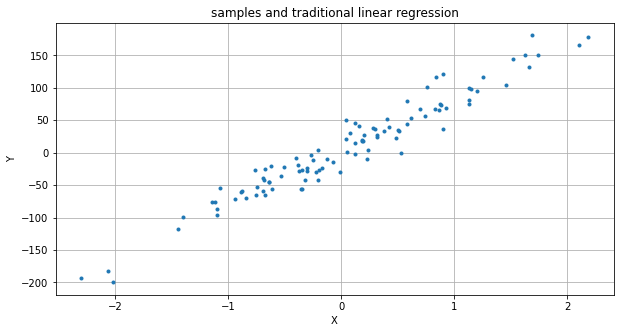

In [3]:
# convert X_numpy to horizental array
x_numpy = X_numpy.T[0]

# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples and traditional linear regression')

## 2.1 Sklearn for linear regression

sklearn provided the supervise learning module for linear regression

In [4]:
# do a traditional linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_numpy.T[0][:, np.newaxis], y_numpy)
xfit = np.linspace(X_numpy.min(), X_numpy.max(), 1000)
yfit = lr_model.predict(xfit[:, np.newaxis])

Text(0.5, 1.0, 'samples for linear regression and result from sklearn module')

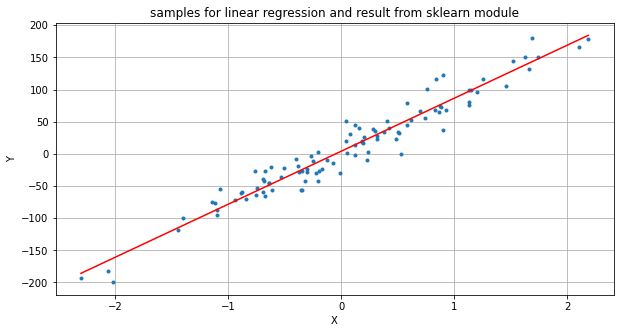

In [5]:
# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.plot(xfit, yfit, "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for linear regression and result from sklearn module')

## 2.1 Sklearn for polynomial regression

Text(0.5, 1.0, 'samples for curve regression')

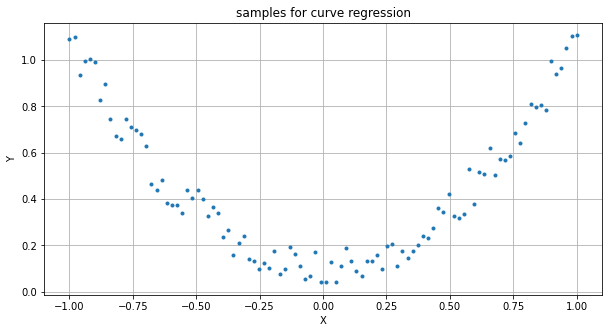

In [6]:
import torch
import torch.nn as nn

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
#y = torch.erf(x) + 0.3*torch.rand(x.size())             # noisy y data (tensor), shape=(100, 1)

# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(x.data.numpy(), y.data.numpy(),'.',label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for curve regression')

In [7]:
# Polynimial Regression
polynomial_degree = 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=polynomial_degree)
X_poly= poly_reg.fit_transform(x)

lin_reg= LinearRegression()
lin_reg.fit(X_poly,y)

lin_reg.predict(poly_reg.transform(np.array(6.5).reshape((-1,1))))

array([[49.0692209]])

Text(0.5, 1.0, 'samples for polynomial regression')

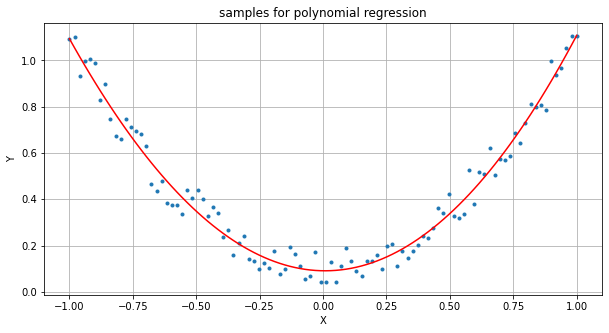

In [8]:
# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(x.data.numpy(), y.data.numpy(),'.',label='training data')
plt.plot(x, lin_reg.predict(poly_reg.transform(x)), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for polynomial regression')